In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df_metroes = pd.read_csv("data/api_metro_stations.csv")
estate_cities = pd.read_csv("data/estate_cities.csv")

In [70]:
df_metroes

,color,full_name,id,name,route_type,subtype,type,point.lat,point.lon,city
0,#E90101,"Москва, Прокшино",70030076182844294,Прокшино,metro,metro,station,55.586458,37.433136,Москва
1,#E90101,"Москва, Ольховая",70030076182844297,Ольховая,metro,metro,station,55.569063,37.458993,Москва
2,#E90101,"Москва, Новомосковская",70030076182844300,Новомосковская,metro,metro,station,55.559999,37.468689,Москва
3,#ACBFE1,"Москва, Бунинская аллея",4504385606388666,Бунинская аллея,metro,metro,station,55.537976,37.515831,Москва
4,#ACBFE1,"Москва, Бульвар Адмирала Ушакова",4504385606386967,Бульвар Адмирала Ушакова,metro,metro,station,55.545264,37.542472,Москва
...,...,...,...,...,...,...,...,...,...,...
446,#E90101,"Санкт-Петербург, Политехническая",5348810536517986,Политехническая,metro,metro,station,60.008889,30.370917,Санкт-Петербург
447,#0064AF,"Санкт-Петербург, Проспект Просвещения",5348810536521400,Проспект Просвещения,metro,metro,station,60.051381,30.332672,Санкт-Петербург
448,#0064AF,"Санкт-Петербург, Озерки",5348810536521399,Озерки,metro,metro,station,60.037105,30.321569,Санкт-Петербург
449,#E90101,"Санкт-Петербург, Гражданский проспект",5348810536521406,Гражданский проспект,metro,metro,station,60.034910,30.418230,Санкт-Петербург


In [17]:
estate_cities

,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,address_info,district,lat,lon
0,1500000,"Пречистенка, 19/11 ст2",Москва,13636,110,Универсальное помещение,https://msk.n1.ru/view/114210381/?open_card_kn,"Пречистенка, 19/11 ст2, Москва, Россия","{'district': 'район Хамовники', 'lat': 55.7430...",район Хамовники,55.743015,37.596967
1,1197919,"Таежная, 1",Москва,1917,625,Универсальное помещение,https://msk.n1.ru/view/115999047/?open_card_kn,"Таежная, 1, Москва, Россия","{'district': 'Лосиноостровский район', 'lat': ...",Лосиноостровский район,55.881107,37.700736
2,274809,"Дмитровка Б., 32 ст4",Москва,4084,67,Универсальное помещение,https://msk.n1.ru/view/116261376/?open_card_kn,"Дмитровка Б., 32 ст4, Москва, Россия","{'district': 'Район не найден', 'lat': 55.1728...",Район не найден,55.172889,37.122824
3,386458,"Шумкина, 20 ст1",Москва,1459,265,Универсальное помещение,https://msk.n1.ru/view/116011103/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.789422,37.666981
4,68125,"Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.789422,37.666981
...,...,...,...,...,...,...,...,...,...,...,...,...
9422,139000,"Московский проспект, 72 корп. 2",Санкт-Петербург,2249,61,Помещение под бар/ресторан,https://spb.n1.ru/view/106961445/?open_card_kn,"Московский проспект, 72 корп. 2, Санкт-Петербу...","{'district': 'округ Измайловское', 'lat': 59.9...",округ Измайловское,59.902811,30.318498
9423,961538,"Энергетиков проспект, 6",Санкт-Петербург,3083,311,Помещение под бар/ресторан,https://spb.n1.ru/view/110365219/?open_card_kn,"Энергетиков проспект, 6, Санкт-Петербург, Россия","{'district': 'округ Большая Охта', 'lat': 59.9...",округ Большая Охта,59.955832,30.432095
9424,110000,"Заозерная, 3 корп. 3",Санкт-Петербург,2444,45,Помещение под бар/ресторан,https://spb.n1.ru/view/112083708/?open_card_kn,"Заозерная, 3 корп. 3, Санкт-Петербург, Россия","{'district': 'округ Московская застава', 'lat'...",округ Московская застава,59.906229,30.324407
9425,518960,"Заречная, 52 корп. 1",Санкт-Петербург,2600,199,Помещение под бар/ресторан,https://spb.n1.ru/view/113137877/?open_card_kn,"Заречная, 52 корп. 1, Санкт-Петербург, Россия","{'district': 'Торфяное', 'lat': 60.082999, 'lo...",Торфяное,60.082999,30.342624


Функция для нахождения расстояние по координатам (на вход коорд. метро и коорд. помещений)

$d = 2R \cdot \arcsin\left(
\sqrt{
\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right)
+
\cos(\varphi_1)\cos(\varphi_2)\sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)
}
\right)
$

In [71]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) **2 
    return  2 * R * np.arcsin(np.sqrt(a))

In [72]:
def find_nearest_metro(place_lat, place_lon, df_metroes):
    distances = haversine(
        place_lat,
        place_lon,
        df_metroes['point.lat'].values,
        df_metroes['point.lon'].values
    )
    
    idx_min = distances.argmin()
    return pd.Series({
        'nearest_metro' : df_metroes.iloc[idx_min]['full_name'],
        'distance_km': distances[idx_min]
    })


In [73]:
df_metroes

,color,full_name,id,name,route_type,subtype,type,point.lat,point.lon,city
0,#E90101,"Москва, Прокшино",70030076182844294,Прокшино,metro,metro,station,55.586458,37.433136,Москва
1,#E90101,"Москва, Ольховая",70030076182844297,Ольховая,metro,metro,station,55.569063,37.458993,Москва
2,#E90101,"Москва, Новомосковская",70030076182844300,Новомосковская,metro,metro,station,55.559999,37.468689,Москва
3,#ACBFE1,"Москва, Бунинская аллея",4504385606388666,Бунинская аллея,metro,metro,station,55.537976,37.515831,Москва
4,#ACBFE1,"Москва, Бульвар Адмирала Ушакова",4504385606386967,Бульвар Адмирала Ушакова,metro,metro,station,55.545264,37.542472,Москва
...,...,...,...,...,...,...,...,...,...,...
446,#E90101,"Санкт-Петербург, Политехническая",5348810536517986,Политехническая,metro,metro,station,60.008889,30.370917,Санкт-Петербург
447,#0064AF,"Санкт-Петербург, Проспект Просвещения",5348810536521400,Проспект Просвещения,metro,metro,station,60.051381,30.332672,Санкт-Петербург
448,#0064AF,"Санкт-Петербург, Озерки",5348810536521399,Озерки,metro,metro,station,60.037105,30.321569,Санкт-Петербург
449,#E90101,"Санкт-Петербург, Гражданский проспект",5348810536521406,Гражданский проспект,metro,metro,station,60.034910,30.418230,Санкт-Петербург


In [74]:
df_metroes.loc[:, ]

,color,full_name,id,name,route_type,subtype,type,point.lat,point.lon,city
0,#E90101,"Москва, Прокшино",70030076182844294,Прокшино,metro,metro,station,55.586458,37.433136,Москва
1,#E90101,"Москва, Ольховая",70030076182844297,Ольховая,metro,metro,station,55.569063,37.458993,Москва
2,#E90101,"Москва, Новомосковская",70030076182844300,Новомосковская,metro,metro,station,55.559999,37.468689,Москва
3,#ACBFE1,"Москва, Бунинская аллея",4504385606388666,Бунинская аллея,metro,metro,station,55.537976,37.515831,Москва
4,#ACBFE1,"Москва, Бульвар Адмирала Ушакова",4504385606386967,Бульвар Адмирала Ушакова,metro,metro,station,55.545264,37.542472,Москва
...,...,...,...,...,...,...,...,...,...,...
446,#E90101,"Санкт-Петербург, Политехническая",5348810536517986,Политехническая,metro,metro,station,60.008889,30.370917,Санкт-Петербург
447,#0064AF,"Санкт-Петербург, Проспект Просвещения",5348810536521400,Проспект Просвещения,metro,metro,station,60.051381,30.332672,Санкт-Петербург
448,#0064AF,"Санкт-Петербург, Озерки",5348810536521399,Озерки,metro,metro,station,60.037105,30.321569,Санкт-Петербург
449,#E90101,"Санкт-Петербург, Гражданский проспект",5348810536521406,Гражданский проспект,metro,metro,station,60.034910,30.418230,Санкт-Петербург


In [75]:
estate_cities[['nearest_metro', 'distance_km']] = estate_cities.apply(
    lambda row : find_nearest_metro(row['lat'], row['lon'], df_metroes),
    axis = 1
)

In [76]:
estate_cities.loc[estate_cities['district'] == 'Адрес не найден']

,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,address_info,district,lat,lon,nearest_metro,distance_km
11,800000,"Масловка Верхн., 20 ст1",Москва,2817,283,Универсальное помещение,https://msk.n1.ru/view/111240795/?open_card_kn,"Масловка Верхн., 20 ст1, Москва, Россия","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
14,358800,"проезд улицашоссепр-дпр-д-й, 4 ст4",Москва,1560,230,Универсальное помещение,https://msk.n1.ru/view/114562535/?open_card_kn,"проезд улицашоссепр-дпр-д-й, 4 ст4, Москва, Ро...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
18,87600,"проезд улицашоссепр-дпр-д-й, 4 ст4",Москва,2400,36,Универсальное помещение,https://msk.n1.ru/view/114547323/?open_card_kn,"проезд улицашоссепр-дпр-д-й, 4 ст4, Москва, Ро...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
20,175350,"Летчика Грицевца (п Внуковское), 5",Москва,1500,116,Универсальное помещение,https://msk.n1.ru/view/113087033/?open_card_kn,"Летчика Грицевца (п Внуковское), 5, Москва, Ро...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
21,596100,"Летчика Ульянина (п Внуковское), 4",Москва,2500,238,Универсальное помещение,https://msk.n1.ru/view/113803399/?open_card_kn,"Летчика Ульянина (п Внуковское), 4, Москва, Ро...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,248810,"проспект Малый Васильевского острова, 88",Санкт-Петербург,2764,90,Торговая площадь,https://spb.n1.ru/view/115347994/?open_card_kn,"проспект Малый Васильевского острова, 88, Санк...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
9285,600000,"проспект Средний Васильевского острова, 99/18",Санкт-Петербург,1643,365,Торговая площадь,https://spb.n1.ru/view/114958706/?open_card_kn,"проспект Средний Васильевского острова, 99/18,...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
9294,240000,"3-й (Горелово) проезд, 36",Санкт-Петербург,2448,98,Помещение под бар/ресторан,https://spb.n1.ru/view/109073691/?open_card_kn,"3-й (Горелово) проезд, 36, Санкт-Петербург, Ро...","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN
9314,110000,"Вадима Шефнера, 4",Санкт-Петербург,1271,86,Помещение под бар/ресторан,https://spb.n1.ru/view/112638857/?open_card_kn,"Вадима Шефнера, 4, Санкт-Петербург, Россия","{'district': 'Адрес не найден', 'lat': None, '...",Адрес не найден,NaN,NaN,"Москва, Прокшино",NaN


In [77]:
estate_cities[['lat', 'lon']] = estate_cities[['lat', 'lon']].fillna("Координаты не найдены")
estate_cities['distance_km'] = estate_cities['distance_km'].fillna('Недостаточно данных')

In [78]:
estate_cities['nearest_metro'] = np.where(
    estate_cities['distance_km'] == 'Недостаточно данных',
    'Недостаточно данных',
    estate_cities['nearest_metro']
)

In [79]:
estate_cities

,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,address_info,district,lat,lon,nearest_metro,distance_km
0,1500000,"Пречистенка, 19/11 ст2",Москва,13636,110,Универсальное помещение,https://msk.n1.ru/view/114210381/?open_card_kn,"Пречистенка, 19/11 ст2, Москва, Россия","{'district': 'район Хамовники', 'lat': 55.7430...",район Хамовники,55.743015,37.596967,"Москва, Кропоткинская",0.498615
1,1197919,"Таежная, 1",Москва,1917,625,Универсальное помещение,https://msk.n1.ru/view/115999047/?open_card_kn,"Таежная, 1, Москва, Россия","{'district': 'Лосиноостровский район', 'lat': ...",Лосиноостровский район,55.881107,37.700736,"Москва, Медведково",2.532474
2,274809,"Дмитровка Б., 32 ст4",Москва,4084,67,Универсальное помещение,https://msk.n1.ru/view/116261376/?open_card_kn,"Дмитровка Б., 32 ст4, Москва, Россия","{'district': 'Район не найден', 'lat': 55.1728...",Район не найден,55.172889,37.122824,"Москва, Бунинская аллея",47.593815
3,386458,"Шумкина, 20 ст1",Москва,1459,265,Универсальное помещение,https://msk.n1.ru/view/116011103/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.789422,37.666981,"Москва, Митьково",0.481996
4,68125,"Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.789422,37.666981,"Москва, Митьково",0.481996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9422,139000,"Московский проспект, 72 корп. 2",Санкт-Петербург,2249,61,Помещение под бар/ресторан,https://spb.n1.ru/view/106961445/?open_card_kn,"Московский проспект, 72 корп. 2, Санкт-Петербу...","{'district': 'округ Измайловское', 'lat': 59.9...",округ Измайловское,59.902811,30.318498,"Санкт-Петербург, Фрунзенская (закрыта)",0.383607
9423,961538,"Энергетиков проспект, 6",Санкт-Петербург,3083,311,Помещение под бар/ресторан,https://spb.n1.ru/view/110365219/?open_card_kn,"Энергетиков проспект, 6, Санкт-Петербург, Россия","{'district': 'округ Большая Охта', 'lat': 59.9...",округ Большая Охта,59.955832,30.432095,"Санкт-Петербург, Ладожская",2.639591
9424,110000,"Заозерная, 3 корп. 3",Санкт-Петербург,2444,45,Помещение под бар/ресторан,https://spb.n1.ru/view/112083708/?open_card_kn,"Заозерная, 3 корп. 3, Санкт-Петербург, Россия","{'district': 'округ Московская застава', 'lat'...",округ Московская застава,59.906229,30.324407,"Санкт-Петербург, Фрунзенская (закрыта)",0.377055
9425,518960,"Заречная, 52 корп. 1",Санкт-Петербург,2600,199,Помещение под бар/ресторан,https://spb.n1.ru/view/113137877/?open_card_kn,"Заречная, 52 корп. 1, Санкт-Петербург, Россия","{'district': 'Торфяное', 'lat': 60.082999, 'lo...",Торфяное,60.082999,30.342624,"Санкт-Петербург, Парнас",1.850339


In [80]:
estate_cities.to_csv("data/estate_cities_withMetroes.csv")

In [81]:
estate_cities_withMetroes = pd.read_csv('data/estate_cities_withMetroes.csv')

In [82]:
msk_withMetro = estate_cities_withMetroes.loc[estate_cities_withMetroes['city'] == 'Москва']
spb_withMetro = estate_cities_withMetroes.loc[estate_cities_withMetroes['city'] == 'Санкт-Петербург']

In [83]:
msk_withMetro

,Unnamed: 0,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,address_info,district,lat,lon,nearest_metro,distance_km
0,0,1500000,"Пречистенка, 19/11 ст2",Москва,13636,110,Универсальное помещение,https://msk.n1.ru/view/114210381/?open_card_kn,"Пречистенка, 19/11 ст2, Москва, Россия","{'district': 'район Хамовники', 'lat': 55.7430...",район Хамовники,55.7430154,37.5969667,"Москва, Кропоткинская",0.4986147518013411
1,1,1197919,"Таежная, 1",Москва,1917,625,Универсальное помещение,https://msk.n1.ru/view/115999047/?open_card_kn,"Таежная, 1, Москва, Россия","{'district': 'Лосиноостровский район', 'lat': ...",Лосиноостровский район,55.8811065,37.7007356,"Москва, Медведково",2.5324744833177726
2,2,274809,"Дмитровка Б., 32 ст4",Москва,4084,67,Универсальное помещение,https://msk.n1.ru/view/116261376/?open_card_kn,"Дмитровка Б., 32 ст4, Москва, Россия","{'district': 'Район не найден', 'lat': 55.1728...",Район не найден,55.1728895,37.1228243,"Москва, Бунинская аллея",47.59381546690349
3,3,386458,"Шумкина, 20 ст1",Москва,1459,265,Универсальное помещение,https://msk.n1.ru/view/116011103/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.7894219,37.6669807,"Москва, Митьково",0.48199635660262785
4,4,68125,"Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.7894219,37.6669807,"Москва, Митьково",0.48199635660262785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,7692,1500000,"Краснопролетарская, 36",Москва,3968,378,Помещение под бар/ресторан,https://msk.n1.ru/view/109731158/?open_card_kn,"Краснопролетарская, 36, Москва, Россия","{'district': 'Тверской район', 'lat': 55.77991...",Тверской район,55.7799144,37.605748,"Москва, Новослободская",0.13147486674711037
7693,7693,1176000,"Пресненская набережная, 10с",Москва,6461,182,Помещение под бар/ресторан,https://msk.n1.ru/view/111002230/?open_card_kn,"Пресненская набережная, 10с, Москва, Россия","{'district': 'Пресненский район', 'lat': 55.74...",Пресненский район,55.7488461,37.5353727,"Москва, Москва-Сити",0.11512173600870493
7694,7694,2000000,"Пресненская набережная, 10 ст2",Москва,4819,415,Помещение под бар/ресторан,https://msk.n1.ru/view/109683444/?open_card_kn,"Пресненская набережная, 10 ст2, Москва, Россия","{'district': 'Пресненский район', 'lat': 55.74...",Пресненский район,55.7456698,37.5364632,"Москва, Москва-Сити",0.3289908236581064
7695,7695,300003,"Братиславская, 18 корп. 1",Москва,2041,147,Помещение под бар/ресторан,https://msk.n1.ru/view/112349375/?open_card_kn,"Братиславская, 18 корп. 1, Москва, Россия","{'district': 'район Марьино', 'lat': 55.655882...",район Марьино,55.655882,37.7630836,"Москва, Братиславская",0.8895442902458882


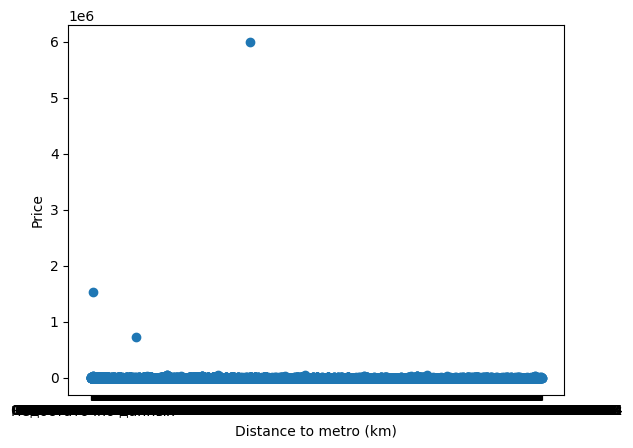

In [84]:
plt.scatter(x=msk_withMetro['distance_km'], y=msk_withMetro['price_per_sqm, rub/month'])
plt.xlabel("Distance to metro (km)")
plt.ylabel("Price")
plt.show()

In [ ]:
msk_withMetro['sq']


,Unnamed: 0,"rent, rub/month",full_address,city,"price_per_sqm, rub/month","square, m^2",type,url,OSM_address,address_info,district,lat,lon,nearest_metro,distance_km
0,0,1500000,"Пречистенка, 19/11 ст2",Москва,13636,110,Универсальное помещение,https://msk.n1.ru/view/114210381/?open_card_kn,"Пречистенка, 19/11 ст2, Москва, Россия","{'district': 'район Хамовники', 'lat': 55.7430...",район Хамовники,55.7430154,37.5969667,"Москва, Кропоткинская",0.4986147518013411
1,1,1197919,"Таежная, 1",Москва,1917,625,Универсальное помещение,https://msk.n1.ru/view/115999047/?open_card_kn,"Таежная, 1, Москва, Россия","{'district': 'Лосиноостровский район', 'lat': ...",Лосиноостровский район,55.8811065,37.7007356,"Москва, Медведково",2.5324744833177726
2,2,274809,"Дмитровка Б., 32 ст4",Москва,4084,67,Универсальное помещение,https://msk.n1.ru/view/116261376/?open_card_kn,"Дмитровка Б., 32 ст4, Москва, Россия","{'district': 'Район не найден', 'lat': 55.1728...",Район не найден,55.1728895,37.1228243,"Москва, Бунинская аллея",47.59381546690349
3,3,386458,"Шумкина, 20 ст1",Москва,1459,265,Универсальное помещение,https://msk.n1.ru/view/116011103/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.7894219,37.6669807,"Москва, Митьково",0.48199635660262785
4,4,68125,"Шумкина, 20 ст1",Москва,2084,32,Универсальное помещение,https://msk.n1.ru/view/115777113/?open_card_kn,"Шумкина, 20 ст1, Москва, Россия","{'district': 'район Сокольники', 'lat': 55.789...",район Сокольники,55.7894219,37.6669807,"Москва, Митьково",0.48199635660262785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7692,7692,1500000,"Краснопролетарская, 36",Москва,3968,378,Помещение под бар/ресторан,https://msk.n1.ru/view/109731158/?open_card_kn,"Краснопролетарская, 36, Москва, Россия","{'district': 'Тверской район', 'lat': 55.77991...",Тверской район,55.7799144,37.605748,"Москва, Новослободская",0.13147486674711037
7693,7693,1176000,"Пресненская набережная, 10с",Москва,6461,182,Помещение под бар/ресторан,https://msk.n1.ru/view/111002230/?open_card_kn,"Пресненская набережная, 10с, Москва, Россия","{'district': 'Пресненский район', 'lat': 55.74...",Пресненский район,55.7488461,37.5353727,"Москва, Москва-Сити",0.11512173600870493
7694,7694,2000000,"Пресненская набережная, 10 ст2",Москва,4819,415,Помещение под бар/ресторан,https://msk.n1.ru/view/109683444/?open_card_kn,"Пресненская набережная, 10 ст2, Москва, Россия","{'district': 'Пресненский район', 'lat': 55.74...",Пресненский район,55.7456698,37.5364632,"Москва, Москва-Сити",0.3289908236581064
7695,7695,300003,"Братиславская, 18 корп. 1",Москва,2041,147,Помещение под бар/ресторан,https://msk.n1.ru/view/112349375/?open_card_kn,"Братиславская, 18 корп. 1, Москва, Россия","{'district': 'район Марьино', 'lat': 55.655882...",район Марьино,55.655882,37.7630836,"Москва, Братиславская",0.8895442902458882


In [62]:
from scipy.stats import spearmanr

In [66]:

rho, p_value = spearmanr(
    msk_withMetro['distance_km'],
    msk_withMetro['price_per_sqm, rub/month'],
    alternative='less'
)
rho, p_value

(np.float64(-0.24938324572900414), np.float64(9.298861758044568e-110))

Вроде как из этого следует, что гипотеза подтверждается